# Zadanie 1.
Wygeneruj dane zgodnie z poniższym przykładem. Następnie dopasuj regresje liniową, wielomianową stopnia 3 i 17. Dane oraz wszystkie trzy krzywe umieść na jednym wykresie. Ponadto dobierz standardową ridge regression z parametrem lambda równym 1 i 10, a także biorąc pod uwagę (w funkcji kary) wszystkie współczynnniki. Porównaj na wykresie nowe krzywe z regresją wielomianową stopnia 17.


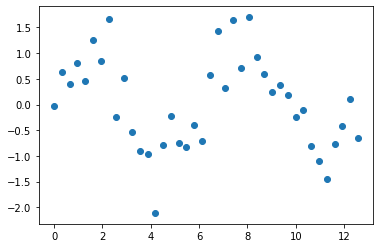

In [87]:
import numpy as np
x=np.linspace(0,4*np.pi,40)
y=np.sin(x)+np.random.normal(0,0.4,40)
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()
import sklearn.linear_model as lm
#lub
#form sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, LogisticRegression # do ridge regression

import sklearn.preprocessing as pr # do wyrenerowania danych X w dopasowaniu liniowym (kolejnych poteg zmiennej x)
#lub
from sklearn.preprocessing import PolynomialFeatures

X = x[np.newaxis].T
Y = y[np.newaxis].T

x1 = pr.PolynomialFeatures(1).fit_transform(X)
x3 = pr.PolynomialFeatures(3).fit_transform(X)
x17 = pr.PolynomialFeatures(17).fit_transform(X)

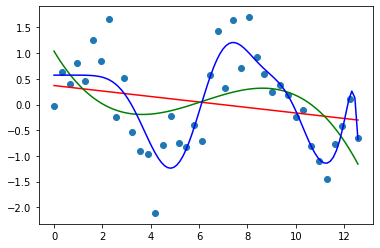

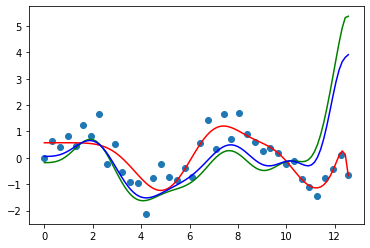

In [88]:
model_lin1 = lm.LinearRegression().fit(x1,Y)
model_lin3 = lm.LinearRegression().fit(x3,Y)
model_lin17 = lm.LinearRegression().fit(x17,Y)

x_test = np.linspace(0, 4*np.pi, 100)[np.newaxis].T
x_test1 = pr.PolynomialFeatures(1).fit_transform(x_test)
x_test3 = pr.PolynomialFeatures(3).fit_transform(x_test)
x_test17 = pr.PolynomialFeatures(17).fit_transform(x_test)

Y_pred1 = model_lin1.predict(x_test1)
Y_pred3 = model_lin3.predict(x_test3)
Y_pred17 = model_lin17.predict(x_test17)

plt.scatter(x,y)
plt.plot(x_test,Y_pred1, color='red')
plt.plot(x_test,Y_pred3, color='green')
plt.plot(x_test,Y_pred17, color='blue')

plt.show()

model_ridge1 = lm.Ridge(alpha=1.0).fit(x17,y)
model_ridge10 = lm.Ridge(alpha=10.0).fit(x17,y)

Y_pred_ridge1 = model_ridge1.predict(x_test17)
Y_pred_ridge10 = model_ridge10.predict(x_test17)

plt.scatter(x,y)
plt.plot(x_test,Y_pred17, color='red')
plt.plot(x_test,Y_pred_ridge1, color='green')
plt.plot(x_test,Y_pred_ridge10, color='blue')

plt.show()

# Zadanie 2.
Korzystając z równania normalnego dla regresji liniowej z regularyzacją ($X'^TX'+\lambda I_{p-1}\beta')=X'^Ty$ i $\beta_0$ równa sredniej z $y$) oblicz bety dla danych z poprzedniego przykładu oraz porównaj je z wynikami uzyskanymi wcześniej.


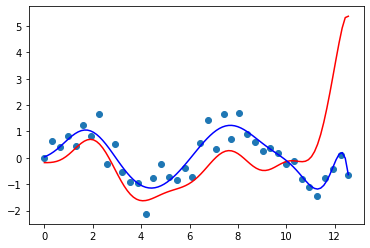

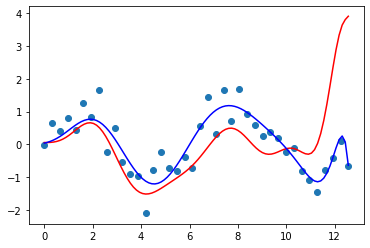

In [89]:
X = x17[:,1:]

alpha = 1.0

A = np.dot(X.T,X) + alpha*np.identity(17)
B = np.dot(X.T,Y)

beta1 = np.linalg.solve(A,B).flatten()
beta1 = np.insert(beta1,0,np.mean(y))

alpha = 10.0

A = np.dot(X.T,X) + alpha*np.identity(17)
B = np.dot(X.T,Y)

beta10 = np.linalg.solve(A,B)
beta10 = np.insert(beta10,0,np.mean(y))[np.newaxis]

Y_pred_norm1 = np.dot(x_test17,beta1.T)
Y_pred_norm10 = np.dot(x_test17,beta10.T)

plt.scatter(x,y)
plt.plot(x_test,Y_pred_ridge1, color='red')
plt.plot(x_test,Y_pred_norm1, color='blue')
plt.show()

plt.scatter(x,y)
plt.plot(x_test,Y_pred_ridge10, color='red')
plt.plot(x_test,Y_pred_norm10, color='blue')
plt.show()

# Zadanie 3.
Wygeneruj dane zgodnie z poniższym przykładem. Następnie dopasuj regresje logistyczną (zmiennej zależnej y od dwóch zmiennych Data[:,0], Data[:,1]) oraz regresję logistyczną od zmiennych Data[:,0], Data[:,1] i potęg(do stopnia 4) zmiennej Data[:,1].
Dane oraz dwie krzywe brzegowe umieść na jednym wykresie. Ponadto wykonaj regresje logistyczą z regularyzacją l2 z parametrem lambda równym 1 i 10, a także nie biorąc pod uwagę współczynnika zerowego. Porównaj na wykresie nowe krzywe z wcześniejszymi.
Przedstaw też tabele "True/False Positive/Negative" dla modeli wykonanych w tym zadaniu.

In [76]:
N=30

df1 =5*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])
df2 =10+10*pd.DataFrame(np.random.randn(N, 3), columns=['A', 'B','C'])

Data=np.concatenate((df1, df2), axis=0)
Data[:,2]=1
Data[0:N,2]=0


import matplotlib.pyplot as plt

s='b'*N+'r'*N
#plt.scatter(Data[:,0],Data[:,1], s=5,alpha=1,c=list(s))
#plt.show()



C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[ 1.97036045e-01  6.59595852e-02  2.06948455e-02 -3.47562838e-04
   4.33684753e-05]]
[-2.28836856]


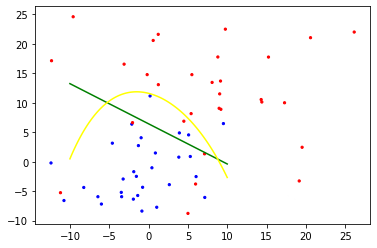

C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


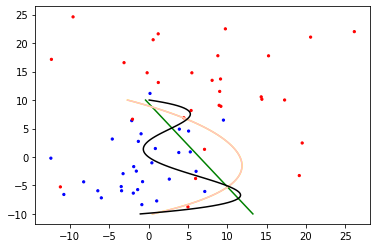

In [90]:
x = Data[:,0:2]
y = Data[:,2]

t = pr.PolynomialFeatures(4).fit_transform(Data[:,1][np.newaxis].T)[:,1:]
x_power = np.concatenate((Data[:,0][np.newaxis].T,t),axis=1)

model0 = lm.LogisticRegression().fit(x,y)
model_power = lm.LogisticRegression().fit(x_power,y)

print(model_power.coef_)
print(model_power.intercept_)

X = np.linspace(-10,10,100)
X_power = pr.PolynomialFeatures(4).fit_transform(X[np.newaxis].T)
Y = (-model0.intercept_ - model0.coef_[0][0]*X)/model0.coef_[0][1]
plt.plot(X,Y,color='green')

Y_power = (model_power.intercept_ + model_power.coef_[0,1]*X + model_power.coef_[0,2]*X**2 + model_power.coef_[0,3]*X**3 + model_power.coef_[0,4]*X**4)/(-model_power.coef_[0,0])
plt.plot(X,Y_power, color='yellow')

s='b'*N+'r'*N
plt.scatter(Data[:,0],Data[:,1], s=5,alpha=1,c=list(s))
plt.show()

#model_log1 = lm.LogisticRegression(C=1.).fit(x_power,y)
model_log10 = lm.LogisticRegression(C=.1).fit(x_power,y)
model_no0 = lm.LogisticRegression(fit_intercept=False).fit(x_power,y)

Y = (-model0.intercept_ - model0.coef_[0][0]*X)/model0.coef_[0][1]
plt.plot(Y,X,color='green')
Y_power = (model_power.intercept_ + model_power.coef_[0,1]*X + model_power.coef_[0,2]*X**2 + model_power.coef_[0,3]*X**3 + model_power.coef_[0,4]*X**4)/(-model_power.coef_[0,0])
plt.plot(Y_power,X, color='yellow')
Y_log10 = (model_log10.intercept_ + model_log10.coef_[0,1]*X + model_log10.coef_[0,2]*X**2 + model_log10.coef_[0,3]*X**3 + model_log10.coef_[0,4]*X**4)/(-model_log10.coef_[0,0])
plt.plot(Y_power,X, color='pink')
Y_no0 = (model_no0.intercept_ + model_no0.coef_[0,1]*X + model_no0.coef_[0,2]*X**2 + model_no0.coef_[0,3]*X**3 + model_no0.coef_[0,4]*X**4)/(-model_no0.coef_[0,0])
plt.plot(Y_no0,X, color='black')

s='b'*N+'r'*N
plt.scatter(Data[:,0],Data[:,1], s=5,alpha=1,c=list(s))
plt.show()



In [78]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score

y0 = model0.predict(x)
y_power = model_power.predict(x_power)
y_log10 = model_log10.predict(x_power)
y_no0 = model_no0.predict(x_power)

print("Model klasyczny")
print(confusion_matrix(y,y0))
print("Wielomian z lambda = 1")
print(confusion_matrix(y,y_power))
print("Wielomian z lambda =10")
print(confusion_matrix(y,y_log10))
print("Wielomian bez dopasowania współczynnika zero")
print(confusion_matrix(y,y_no0))

Model klasyczny
[[26  4]
 [ 5 25]]
Wielomian z lambda = 1
[[28  2]
 [ 4 26]]
Wielomian z lambda =10
[[28  2]
 [ 6 24]]
Wielomian bez dopasowania współczynnika zero
[[22  8]
 [ 5 25]]


# Zadanie 4
Dla dobrze znanych danych iris wykonaj powyższe polecenia, tj. dopasuj model logistyczny bez regularyzacji oraz z regularyzacją przy różnie dobranych parametrach. Każdy model zobrazuj na odpowiednim wykresie oraz porównaj podstawowe charakterystyki modeli (wynikające z tabeli "True/False Positive/Negative").

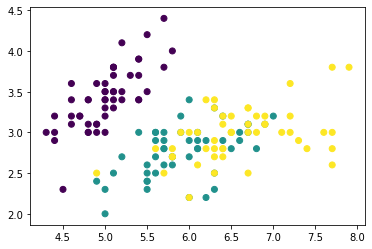

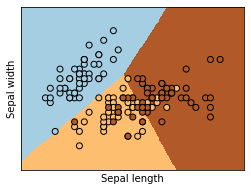

[[50  0  0]
 [ 0 37 13]
 [ 0 14 36]]


In [79]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
import matplotlib.pyplot as plt

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()
Xa = iris.data[:,:2]# r
ya = iris.target
model_a = LogisticRegression().fit(Xa,ya)
y_pred_a = model_a.predict(Xa)
#plt.scatter(X41[:,0],X41[:,1],c=y_pred41)
x_min, x_max = Xa[:, 0].min() - .5, Xa[:, 0].max() + .5
y_min, y_max = Xa[:, 1].min() - .5, Xa[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model41.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()
plt.show()
print(confusion_matrix(ya, y_pred_a))

C: 8


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


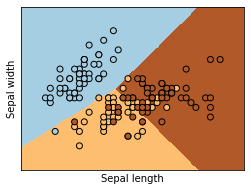

[[16  0  0]
 [ 1 12  6]
 [ 0  4 11]]
Dokładność 0: 1.0
Dokładność 1: 0.631578947368421
Dokładność 2: 0.7333333333333333

C: 4


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


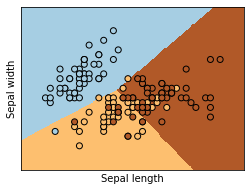

[[16  0  0]
 [ 1 12  6]
 [ 0  4 11]]
Dokładność 0: 1.0
Dokładność 1: 0.631578947368421
Dokładność 2: 0.7333333333333333

C: 2


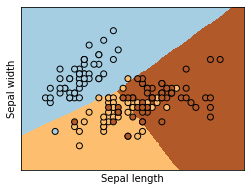

[[16  0  0]
 [ 1  8 10]
 [ 0  4 11]]
Dokładność 0: 1.0
Dokładność 1: 0.42105263157894735
Dokładność 2: 0.7333333333333333

C: 1


C:\Users\Dawid\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


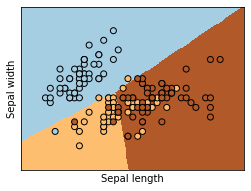

[[16  0  0]
 [ 1  6 12]
 [ 0  1 14]]
Dokładność 0: 1.0
Dokładność 1: 0.3157894736842105
Dokładność 2: 0.9333333333333333

C: 0.1


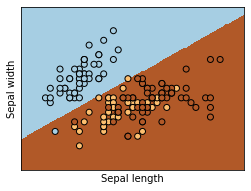

[[16  0  0]
 [ 0  0 19]
 [ 0  0 15]]
Dokładność 0: 1.0
Dokładność 1: 0.0
Dokładność 2: 1.0

C: 0.01


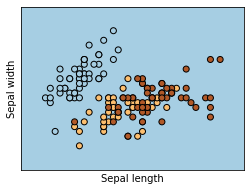

[[ 0  0 16]
 [ 0  0 19]
 [ 0  0 15]]
Dokładność 0: 0.0
Dokładność 1: 0.0
Dokładność 2: 1.0



In [85]:
from sklearn.model_selection import train_test_split

Xb = iris.data[:,:2]
yb = iris.target
Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.33, random_state=0)
sc = pr.StandardScaler()
Xb_train_std = sc.fit_transform(Xb_train)
Xb_test_std = sc.transform(Xb_test)
C = [8,4,2,1,.1,.01]

for c in C:
    print('C:', c)
    model = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    model.fit(Xb_train, yb_train)
    yb_pred = model.predict(Xb_test)

    x_min, x_max = Xb[:, 0].min() - .5, Xb[:, 0].max() + .5
    y_min, y_max = Xb[:, 1].min() - .5, Xb[:, 1].max() + .5
    h = .02  # krok w meshu
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(4, 3))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


    plt.scatter(Xb[:, 0], Xb[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()
    plt.show()    
    
    A = confusion_matrix(yb_test,yb_pred)
    print(A)
    print('Dokładność 0:', A[0,0]/(A[0,0]+A[0,1]+A[0,2]))
    print('Dokładność 1:', A[1,1]/(A[1,0]+A[1,1]+A[1,2]))
    print('Dokładność 2:', A[2,2]/(A[2,0]+A[2,1]+A[2,2]))
    print('')
#model42 = LogisticRegression().fit(X42,y42)
#y_pred42 = model42.predict(X42)
#plt.scatter(X42[:,0],X42[:,1],c=y_pred42)
#plt.show()
#print(confusion_matrix(y42, y_pred42))

# Zadanie 5
Dla danych iris wytrenuj możliwie najlepszy model regresji logistycznej. Dobierz optymalne parametry za pomocą testowania krzyżowego. W tym celu oprócz już poznanych funkcji można zapoznać się z <tt>GridSerachCV</tt>.

In [ ]:
X=iris.data[:100,:]
y=iris.target[:100]
#print(X)
#from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.3)
grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(x_train,y_train)
print(logreg_cv.best_params_)
print(logreg_cv.best_score_)